# Decision Tree

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn import metrics
from sklearn.preprocessing import scale

import os
#sklearn.tree의 Decision Tree classifier:분류의사결정나무
from sklearn.tree import DecisionTreeClassifier
#sklearn.tree의 export_graphviz: graphviz패키지가 사용할수 있는.dot 확장자 파일로저장
from sklearn.tree import export_graphviz
#graphviz import:의사결정 나무 모델 시각화 .dot확장자 파일 불러오는 패키지
import graphviz

#pandas describe 생략되는 것 표시
pd.set_option('display.max_columns', None)  
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import GridSearchCV


## Data Loading

In [2]:
b_cancer = pd.read_csv("/home/pirl/Downloads/유방암.csv",engine = 'python',
                        encoding='CP949')
#sns.countplot(b_cancer["diagnosis"],label="Count")
b_cancer.describe()

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [3]:
#print(b_cancer.isnull().sum(axis=0))
b_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
diagnosis                  569 non-null int64
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 no

#### 목표변수 하나와 설명 변수 30가지로 구성된 데이터이며,목표변수는 이산형이다. 결측치는 존재 하지 않았다. 목표변수 diagnosis가 0과1로된 형태이기에 데이터 변환은 하지 않는다.

## Data Split

In [4]:
#데이터 구성하기
#데이터분할(train,test 7:3비율로 분할,numpy의 random 함수 이용 방법)
np.random.seed(1234)
#0.7보다 작으면 true, -> train, 아니면 false -> test
msk = np.random.rand(b_cancer.shape[0]) < 0.7
b_train = b_cancer[msk]
b_test = b_cancer[~msk]
#train/test 데이터의 목표변수 설명변수 지정
b_train_y = b_train["diagnosis"]
b_train_x = b_train.drop("diagnosis",axis=1,inplace=False)
b_test_y = b_test["diagnosis"]
b_test_x = b_test.drop("diagnosis",axis=1,inplace=False)
#데이터 크기
print("train data X size: {}".format(b_train_x.shape))
print("train data Y size: {}".format(b_train_y.shape))
print("test data X size: {}".format(b_test_x.shape))
print("test data X size: {}".format(b_test_y.shape))

train data X size: (385, 30)
train data Y size: (385,)
test data X size: (184, 30)
test data X size: (184,)


#### 학습 데이터 70대 테스트데이터 30으로 선택했다.

In [5]:
######################tree_uncustomized!!!!
tree_uncustomized = DecisionTreeClassifier(random_state=1234)
tree_uncustomized.fit(b_train_x,b_train_y)
#훈련데이터 정확도
print("Accuracry on training set: {:.3f}".format(tree_uncustomized.score(b_train_x,
                                                                        b_train_y)))
#test 데이터 정확도
print("Accuracry on training set: {:.3f}".format(tree_uncustomized.score(b_test_x,
                                                                       b_test_y)))


Accuracry on training set: 1.000
Accuracry on training set: 0.935


In [6]:
tree_uncustomized.get_params

<bound method BaseEstimator.get_params of DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')>

## Optimiziation

In [7]:
#train 및 test정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
#parameter 결과 테이블을 위함
para_criterion = []; para_max_depth = []
#최대 깊이 1~10까지 순차 실행
n_iter_depth = 10
#적용가능한 criterion:gini,entropy
list_criterion = ["gini","entropy"]
#criterion:gini,entropy & max_depth: 1~10까지 반복 실행
for criterion in list_criterion:
    for depth in range(1,n_iter_depth+1):
        tree2 = DecisionTreeClassifier(criterion=criterion,max_depth=depth,random_state=1234)
        tree2.fit(b_train_x,b_train_y)
        
        train_accuracy.append(tree2.score(b_train_x,b_train_y))
        test_accuracy.append(tree2.score(b_test_x,b_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(depth)

In [8]:
#데이터 테이블로 저장
ds_accuracy2 = pd.DataFrame()
ds_accuracy2["Criterion"] = para_criterion
ds_accuracy2["Depth"] = para_max_depth
ds_accuracy2["TrainAccuracy"] = train_accuracy
ds_accuracy2["TestAccuracy"] = test_accuracy
ds_accuracy2.round(3)

,Criterion,Depth,TrainAccuracy,TestAccuracy
0,gini,1,0.922,0.908
1,gini,2,0.943,0.940
2,gini,3,0.971,0.924
3,gini,4,0.992,0.946
4,gini,5,0.995,0.935
5,gini,6,0.997,0.935
6,gini,7,1.000,0.935
7,gini,8,1.000,0.935
8,gini,9,1.000,0.935
9,gini,10,1.000,0.935


#### entropy 를 사용했을경우 97%정도의 정확도로 gini index 보다 더나은 결과를 얻을수 있었다.

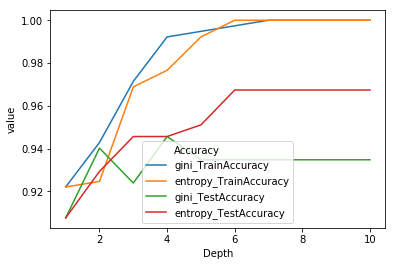

In [9]:
#데이터 테이블로 저장
ds_accuracy2_melt = pd.melt(ds_accuracy2,id_vars=["Criterion","Depth"])
ds_accuracy2_melt["Accuracy"] = ds_accuracy2_melt["Criterion"]+"_"+ds_accuracy2_melt["variable"]
sns.lineplot(x="Depth",y="value",hue="Accuracy",data=ds_accuracy2_melt)

#### 위의 내용을 조금더 직관적이게 확인할수 있는 그래프로, train데이터에선 둘다 100% 정확도를 보여주었지만, 테스트셋에선, enthory 지수가 4%정도의 더욱 높은 정확도를 보여주었다. Gini와 Entropy의 정확도가 같아 지는 지점이 있는데, tree깊이가 4 정도에서 같아진다. 이후론 gini는 떨어 지고 entropy는 정확도가 증가하는데, 깊이가 4일경우 gini지수와 entropy 지수 둘중 아무거나 사용해도 무관할것으로 보인다.                          하지만 테스트셋에서 높은 정확도를 보이는 entropy를 사용하고, 깊이는 6으로 해주는게 제일 높은 정확도를 가진다.

In [10]:
#train 및 test정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
#parameter 결과 테이블을 위함
para_criterion=[];para_max_depth = []; para_min_leaf_size=[]
#최대 깊이 6
max_depth = 6
#잎사귀 수 2~18까지 2단위로 순차 실행
list_min_leaf_size = [i*2 for i in range(1,10)]
#criterion:gini,entropy & min smaple size 10~50까지 반복 실행
for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                      min_samples_leaf=leafsize, random_state=1234)
        tree3.fit(b_train_x,b_train_y)
        train_accuracy.append(tree3.score(b_train_x,b_train_y))
        test_accuracy.append(tree3.score(b_test_x,b_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [11]:
#데이터 테이블로 저장
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
#ds_accuracy3.round(3)

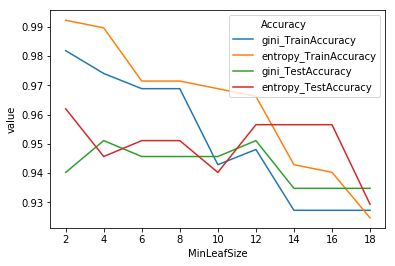

In [12]:
ds_accuracy3_melt = pd.melt(ds_accuracy3,id_vars=["Criterion","Depth","MinLeafSize"])
ds_accuracy3_melt["Accuracy"]=ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize",y="value",hue="Accuracy",data=ds_accuracy3_melt)

#### entropy와 gini 지수 둘다 minLeaf크기가 4일경우 같은 정확도를 가진다. 나누는 데이터수가 높으면 높을수록 나누는 변수 수가 감소한다고 생각할수 있는데(적은 수의 변수로 더 높은 설명력을 가진다.) entropy의 경우 15정도일경우 더욱 높은 정확도를 보이고 minLeafsize가 조금더 크기 때문에 15인 트리 모델을 그려 보겠다.

## DecisionTree Modeling

Accuracy: 0.957


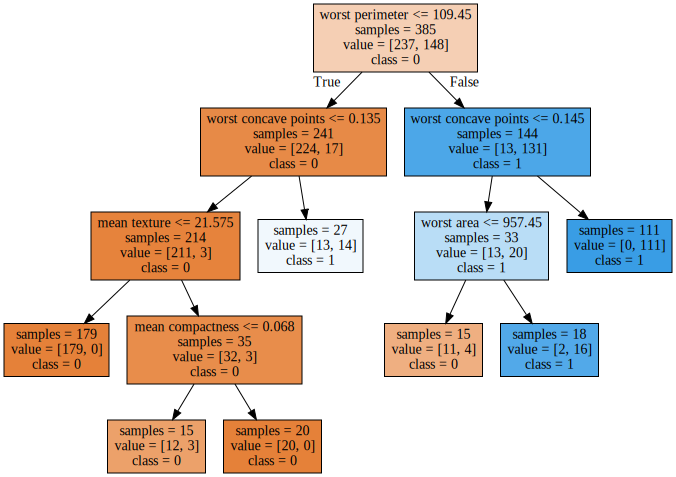

In [13]:
#트리모델 생성, entropy ,depth=6로 모델 생성
tree1 = DecisionTreeClassifier(criterion="entropy",max_depth=6,random_state=1234,
                         min_samples_leaf=15)
#tree model training
tree1.fit(b_train_x,b_train_y)
print("Accuracy: {0:.3f}".format(tree1.score(b_test_x,b_test_y)))
#트리모델을 tree.dot파일로 저장
export_graphviz(tree1,out_file="tree.dot", class_names=["0","1"],
              feature_names=b_train_x.columns,impurity=False,filled=True)
#path 설정:graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고
os.environ["PATH"] += os.pathsep +"C:/Users/hjung/Anaconda3/Library/bin/graphviz/"

#graphviz를 이용해 트리 모델 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

#### 정확도는 높은 모델이 나왔지만, 변수를 너무 작게 잘라놓았기 때문에 설명력은 부족하다. 예로, 불필요한 설명 변수(왼쪽 아래, mean texture변수 아래부턴 전부 0으로 표기되었지만, 나눠놓았다.), 또한 트리가 깊어 지면 설명하기 복잡해진다. 조금더 설명력있는 나무를 만들기 위해 브랜치에 들어 가는 데이터수를 늘려 보겠다.

In [14]:
#train 및 test정확도 결과 저장용
train_accuracy = []; test_accuracy=[]
#parameter 결과 테이블을 위함
para_criterion=[];para_max_depth = []; para_min_leaf_size=[]
#최대 깊이 6
max_depth = 6
#잎사귀 수 2~18까지 2단위로 순차 실행
list_min_leaf_size = [i*2 for i in range(1,100)]
#criterion:gini,entropy & min smaple size 10~50까지 반복 실행
for criterion in list_criterion:
    for leafsize in list_min_leaf_size:
        tree3 = DecisionTreeClassifier(criterion=criterion,max_depth=max_depth,
                                      min_samples_leaf=leafsize, random_state=1234)
        tree3.fit(b_train_x,b_train_y)
        train_accuracy.append(tree3.score(b_train_x,b_train_y))
        test_accuracy.append(tree3.score(b_test_x,b_test_y))
        para_criterion.append(criterion)
        para_max_depth.append(max_depth)
        para_min_leaf_size.append(leafsize)

In [15]:
#데이터 테이블로 저장
ds_accuracy3 = pd.DataFrame()
ds_accuracy3["Criterion"] = para_criterion
ds_accuracy3["Depth"] = para_max_depth
ds_accuracy3["MinLeafSize"] = para_min_leaf_size
ds_accuracy3["TrainAccuracy"] = train_accuracy
ds_accuracy3["TestAccuracy"] = test_accuracy
#ds_accuracy3.round(3)

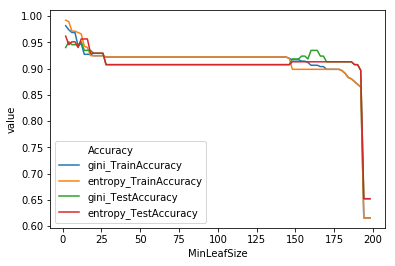

In [16]:
ds_accuracy3_melt = pd.melt(ds_accuracy3,id_vars=["Criterion","Depth","MinLeafSize"])
ds_accuracy3_melt["Accuracy"]=ds_accuracy3_melt["Criterion"]+"_"+ds_accuracy3_melt["variable"]
sns.lineplot(x="MinLeafSize",y="value",hue="Accuracy",data=ds_accuracy3_melt)

#### MinLeafSize가 증가함에 따라 정확도에서 변화가 없어 보이지만, 150개부터 변화가 보인다. 위의 예상과 다르게 gini index가 MinLeafSize =150개 부터 증가량을 보인다. 세밀하게 데이터를 나누면 정확도는 더욱 높지만, 설명하기가 어려워 지는 단점이 있기에 데이터를 조금더 크게 나눠 설명력을 얻는게 더욱 나을수 있다고 판단된다.

## GridSearch Modeling

In [17]:
###################gridsearch

# Choose the type of classifier. 
# Choose some parameter combinations to try
parameters = { 
              #'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': list(i for i in range(1,20)), 
              'min_samples_leaf': list(i for i in range(1,50))
             }

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(tree_uncustomized, parameters)
grid_obj = grid_obj.fit(b_train_x, b_train_y)

# Set the clf to the best combination of parameterstree_uncustomized
searchcv = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
searchcv.fit(b_train_x, b_train_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=5,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

In [18]:
predictions = searchcv.predict(b_test_x)
print(accuracy_score(b_test_y, predictions).round(3))

0.946


### GridSearch 모델은 95%의 정확도를 가졌는데, 이는 위에서 만든 모델보다 정확도가 낮은 모델을 만들었다. GridSearch모델은 train set 에 대해 최적하된 모델이여서 실제 test set에는 정확도가 조금 낮을수 있다고 판단된다.

In [19]:
##############GridsearchCV
# Choose the type of classifier. 
# Choose some parameter combinations to try
parameters = { 
              #'max_features': ['log2', 'sqrt','auto'], 
              'criterion': ['entropy', 'gini'],
              'max_depth': list(i for i in range(1,3)), 
              'min_samples_leaf': list(i for i in range(10,160))
             }

# Type of scoring used to compare parameter combinations
#acc_scorer = make_scorer(accuracy_score)

# Run the grid search
grid_obj = GridSearchCV(tree_uncustomized, parameters)
grid_obj = grid_obj.fit(b_train_x, b_train_y)

# Set the clf to the best combination of parameterstree_uncustomized
searchcv = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
searchcv.fit(b_train_x, b_train_y)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=13, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

#### 그리드서치 매개변수는 이번에는 gini, max_depth=2, min_samples_leaf=13을 설정했다.

In [20]:
predictions = searchcv.predict(b_test_x)
print(accuracy_score(b_test_y, predictions).round(3))

0.935


In [21]:
# tree.feature_importances_로 설명변수 중요도 확인 및 테이블로 저장
ds_feature_importance = pd.DataFrame()
ds_feature_importance["Feature"] = b_train_x.columns
ds_feature_importance["Importance"] = searchcv.feature_importances_
# ds_feature_importance의 테이블을 중요도별로 정렬
ds_feature_importance.sort_values("Importance", ascending=False).round(3)

,Feature,Importance
22,worst perimeter,0.861
27,worst concave points,0.083
6,mean concavity,0.056
0,mean radius,0.000
16,concavity error,0.000
28,worst symmetry,0.000
26,worst concavity,0.000
25,worst compactness,0.000
24,worst smoothness,0.000
23,worst area,0.000


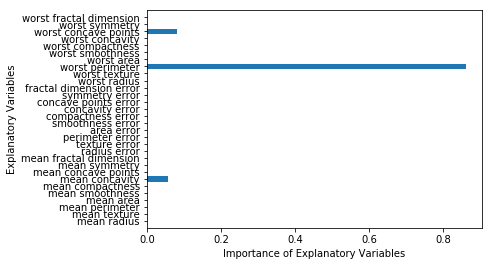

In [22]:
# 설명변수 중요도 그래프 함수 정의
def plot_feature_importances(model):
    n_features = b_train_x.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align="center")
    plt.yticks(np.arange(n_features), b_train_x.columns)
    plt.xlabel("Importance of Explanatory Variables")
    plt.ylabel("Explanatory Variables")
    plt.ylim(-1, n_features)

# 설명변수 중요도 그래프 함수 실행
plot_feature_importances(searchcv)

#### worst perimeter가 가장 중요한 변수이다. 그다음으로 worst symmetry, mean concavity 이다.

## Final Model

Grid_Search_Accuracy: 0.935


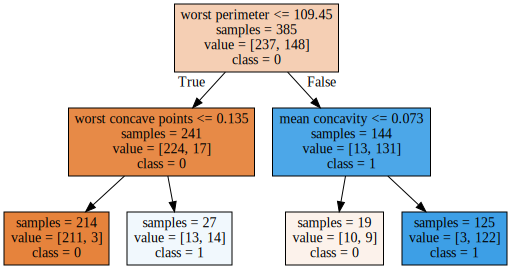

In [23]:
#트리모델 생성, gini ,depth=4로 모델 생성
tree = DecisionTreeClassifier(criterion="gini",max_depth=2,random_state=1234,
                            min_samples_leaf=13,min_samples_split=2)
#tree model training
tree.fit(b_train_x,b_train_y)

print("Grid_Search_Accuracy: {0:.3f}".format(tree.score(b_test_x,b_test_y).round(3)))

#트리모델을 tree.dot파일로 저장
export_graphviz(tree,out_file="tree.dot", class_names=["0","1"],
              feature_names=b_train_x.columns,impurity=False,filled=True)
#path 설정:graphviz를 설치 했다면, 설치 된 경로를 설정. 기본 경로는 아래 예제 참고
os.environ["PATH"] += os.pathsep +"C:/Users/hjung/Anaconda3/Library/bin/graphviz/"

#graphviz를 이용해 트리 모델 시각화
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

### 최종 GridSearch모델의 정확도는 3%정도 감소 하였지만 모델이 많이 간소화 되었다. 모델이 더욱 일반화되었다. 최종 모델은 예측이 중요할경우, 위의 첫번째 세세한 모델로 3%의 정확도를 더 얻을수 있지만, 설명하기 어렵고, 반대로 Gridsearch모델은 설명하긴 수월하고 명확하다. 전체 데이터에 70%의 해당하는 데이터로 모델링하였을때, worst perimeter 가 109.45보다 작을 경우0(악성)으로 볼수 있으며 클경우 1(양성)으로 판단할수 있다. 또한 worst concave point가 0.135보다 작으면 0(악성)이며, 크면 1(양성)이다. 또한, mean concavity 가 0.073보다 작은경우 0(악성)이며 크면 1(양성)으로 볼수 있다. 위의 변수 중요도 그래프에서와 마찬가지로 worst perimeter가 가장 중요한 변수로 사용되었다.